In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt










In [105]:
df = pd.read_csv('R&D 2025 compilation.csv')

In [106]:
import pandas as pd

def generate_frequency_tables(file_path, start_col_index, end_col_index, output_excel_path):
    """
    Generates frequency tables for specified columns in a CSV file and saves them to a single sheet in an Excel file.

    Args:
        file_path (str): The path to the CSV file.
        start_col_index (int): The 0-based index of the starting column (inclusive).
        end_col_index (int): The 0-based index of the ending column (inclusive).
        output_excel_path (str): The path where the Excel file will be saved.
    """
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)

        print(f"Successfully loaded '{file_path}'.")
        print(f"Generating frequency tables for columns {start_col_index + 1} to {end_col_index + 1} (0-indexed: {start_col_index} to {end_col_index}).\n")

        # Select the desired columns
        # Ensure that the column indices are within the DataFrame's bounds
        if not (0 <= start_col_index < df.shape[1] and 0 <= end_col_index < df.shape[1] and start_col_index <= end_col_index):
            print(f"Error: Column indices are out of bounds or invalid. The CSV has {df.shape[1]} columns.")
            return

        # Get the names of the columns to analyze
        # The slice end_col_index + 1 ensures the end_col_index is included
        columns_to_analyze = df.columns[start_col_index : end_col_index + 1]

        all_frequency_dataframes = []

        # Iterate through the selected columns and generate frequency tables
        for col_name in columns_to_analyze:
            print(f"--- Processing Column: '{col_name}' ---")
            # Calculate value counts for the current column
            frequency_table = df[col_name].value_counts().reset_index()
            # Rename columns for clarity in the combined table
            frequency_table.columns = ['Value', 'Frequency']
            # Add a column to identify the original source column
            frequency_table['Original_Column'] = col_name
            all_frequency_dataframes.append(frequency_table)

        if not all_frequency_dataframes:
            print("No frequency tables were generated. Please check column indices and file content.")
            return

        # Concatenate all individual frequency tables into a single DataFrame
        combined_frequency_table = pd.concat(all_frequency_dataframes, ignore_index=True)

        # Reorder columns for better readability: Original_Column, Value, Frequency
        combined_frequency_table = combined_frequency_table[['Original_Column', 'Value', 'Frequency']]

        # Save the combined frequency table to a single sheet in the Excel file
        with pd.ExcelWriter(output_excel_path) as writer:
            combined_frequency_table.to_excel(writer, sheet_name='All_Frequencies', index=False)
            print(f"\nAll frequency tables have been combined and saved to '{output_excel_path}' on sheet 'All_Frequencies'.")

    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found. Please ensure the file is in the correct directory.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Define the file path, column range, and output Excel path
file_path = 'R&D 2025 compilation.csv'
# Columns 1 to 9 (1-indexed) corresponds to 0-indexed columns 0 to 8
# However, the user provided 1 and 9, so we will use those values directly.
start_column_index = 1
end_column_index = 9
output_excel_file = 'R&D_2025_Combined_Frequency_Tables.xlsx'

# Call the function to generate and save frequency tables
generate_frequency_tables(file_path, start_column_index, end_column_index, output_excel_file)


Successfully loaded 'R&D 2025 compilation.csv'.
Generating frequency tables for columns 2 to 10 (0-indexed: 1 to 9).

--- Processing Column: 'Age' ---
--- Processing Column: 'Gender' ---
--- Processing Column: 'Race' ---
--- Processing Column: 'Status' ---
--- Processing Column: 'Children' ---
--- Processing Column: 'Position' ---
--- Processing Column: 'Working_exp' ---
--- Processing Column: 'Education' ---
--- Processing Column: 'Income' ---

All frequency tables have been combined and saved to 'R&D_2025_Combined_Frequency_Tables.xlsx' on sheet 'All_Frequencies'.


In [107]:
 # Define the columns to be analyzed and their corresponding correct answers
correct_answers = {
    'Knowledge_2ai': 'Yes',
    'Knowledge_2b': 'Yes',
    'Knowledge_2c': 'No',
    'Knowledge_2d': 'Yes',
    'Knowledge_2e': 'Yes',
    'Knowledge_2f': 'No',
    'Knowledge_2g': 'Yes',
    'Knowledge_2h': 'No'
}

# Create a list to hold the results for each column
results = []

# Loop through each column defined in the correct_answers dictionary
for col, correct_answer in correct_answers.items():
    if col in df.columns:
        # To ensure accurate counting, we standardize the text to lowercase and remove leading/trailing whitespace.
        # Then, we count the occurrences of each unique value in the column.
        counts = df[col].astype(str).str.strip().str.lower().value_counts()

        # Get the count for the correct answer. If the answer is not found, default to 0.
        correct_count = counts.get(correct_answer.lower(), 0)

        # Determine what the "wrong" answer is (the opposite of the correct one) and get its count.
        wrong_answer = 'no' if correct_answer.lower() == 'yes' else 'yes'
        wrong_count = counts.get(wrong_answer, 0)

        # Any responses that are not the "correct" or "wrong" answer are counted as "Other/Blank".
        other_count = counts.sum() - correct_count - wrong_count

        # Append the results for the current column to our list of results
        results.append({
            'Column': col,
            'Correct': correct_count,
            'Wrong': wrong_count + other_count,
            'Total': counts.sum()
        })

# Create a pandas DataFrame from the list of results
results_df = pd.DataFrame(results)

# Define the name of the output Excel file
output_excel_file = 'R&D_2025_Combined_Frequency_Tables.xlsx'

# Write the DataFrame to an Excel file.
# We use pd.ExcelWriter with mode='a' to append to existing Excel file
try:
    with pd.ExcelWriter(output_excel_file, mode='a', if_sheet_exists='replace') as writer:
        # Write our results DataFrame to a new sheet named 'Frequency_Tables'.
        # index=False prevents pandas from writing the DataFrame index as a column in the Excel sheet.
        results_df.to_excel(writer, sheet_name='Frequency_Tables', index=False)

    print(f"Success! The frequency tables have been saved to '{output_excel_file}' in the sheet named 'Frequency_Tables'.")
    print("\nHere is the data that was saved:")
    print(results_df)

except Exception as e:
    print(f"An error occurred while writing to the Excel file: {e}")

Success! The frequency tables have been saved to 'R&D_2025_Combined_Frequency_Tables.xlsx' in the sheet named 'Frequency_Tables'.

Here is the data that was saved:
          Column  Correct  Wrong  Total
0  Knowledge_2ai      219      2    221
1   Knowledge_2b      104    117    221
2   Knowledge_2c      118    103    221
3   Knowledge_2d      196     25    221
4   Knowledge_2e      202     19    221
5   Knowledge_2f       78    143    221
6   Knowledge_2g      124     97    221
7   Knowledge_2h      138     83    221


In [108]:
# for each row calculate the score 1 if correct answer is according to the correct_answers dictionary, 0 otherwise
df['knowledge_score'] = df.apply(lambda row: sum(
    1 for col, correct_answer in correct_answers.items() if row[col].strip().lower() == correct_answer.lower()
), axis=1)

<Axes: title={'center': 'Knowledge Score Distribution'}, xlabel='knowledge_score'>

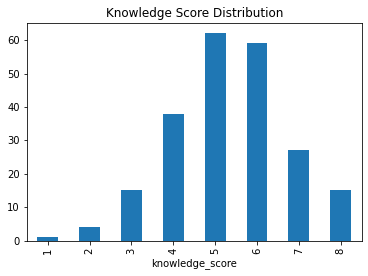

In [109]:
df.value_counts('knowledge_score').sort_index().plot(kind='bar', title='Knowledge Score Distribution')

In [110]:


awareness_cols = [f'Awarenes_{i}' for i in range(1, 8)] # awareness_1 to awareness_7
perception_cols = [f'Perception_{i}' for i in range(1, 11)] # perception_1 to perception_10
awareness_perception_columns = awareness_cols + perception_cols

def generate_specific_columns_report(df, list_of_columns):
    """
    Generates a raw frequency count for a specific list of column names.
    """
    print("\n--- Generating Report for Specific Columns (Awareness & Perception) ---")
    sentiment_categories = ['Strongly agree', 'Agree', 'Not sure', 'Disagree', 'Strongly disagree']
    # Create an empty dictionary to store the results
    results = {}

    # Iterate through each column in the DataFrame
    for col in df[awareness_perception_columns].columns:
        # Count the occurrences of each sentiment category in the current column
        # .reindex ensures all sentiment categories are present, filling missing with 0
        sentiment_counts = df[col].value_counts().reindex(sentiment_categories, fill_value=0)
        results[col] = sentiment_counts

    # Create a new DataFrame from the results dictionary
    result_df = pd.DataFrame(results).T

    # Rename the index to 'Original_Column' for clarity
    result_df.index.name = 'Original_Column'
    result_df.reset_index(inplace=True)

    output_excel_file = 'R&D_2025_Combined_Frequency_Tables.xlsx'
    
    try:
        with pd.ExcelWriter(output_excel_file, mode='a', if_sheet_exists='replace') as writer:
            result_df.to_excel(writer, sheet_name='Awareness_Perception_Frequencies', index=False)
        print(f"\nFrequency tables for Awareness and Perception have been saved to '{output_excel_file}' on sheet 'Awareness_Perception_Frequencies'.")
    except Exception as e:
        print(f"An error occurred while writing to the Excel file: {e}")
    return result_df
# Generate the report for the specified columns
awareness_perception_report = generate_specific_columns_report(df, awareness_perception_columns)

    



--- Generating Report for Specific Columns (Awareness & Perception) ---

Frequency tables for Awareness and Perception have been saved to 'R&D_2025_Combined_Frequency_Tables.xlsx' on sheet 'Awareness_Perception_Frequencies'.


/Users/tankarhau/miniforge3/lib/python3.9/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [111]:
# For: Awareness 3, 5, 6 and Perception 1, 5, 6, 7, 9, 10
score_scheme_2 = {
    'Strongly agree': 1,
    'Agree': 2,
    'Not sure': 3,
    'Disagree': 4,
    'Strongly disagree': 5
}

# Scheme 2: 1 (Strongly disagree) to 5 (Strongly agree) - This is the standard scheme
# For: All other Awareness and Perception columns
score_scheme_1 = {
    'Strongly disagree': 1,
    'Disagree': 2,
    'Not sure': 3,
    'Agree': 4,
    'Strongly agree': 5
}

scheme_1_cols = [
    'Awarenes_3', 'Awarenes_5', 'Awarenes_6',
    'Perception_1', 'Perception_5', 'Perception_6', 'Perception_7', 'Perception_9', 'Perception_10'
]

# Columns using Scheme 2 (the rest)
scheme_2_cols = [col for col in awareness_perception_columns if col not in scheme_1_cols]

# --- Function to calculate scores based on the defined scoring schemes ---
def convert_sentiment_to_score(df, scheme_1_cols, scheme_2_cols, scheme_1_map, scheme_2_map):
    """
    Converts sentiment categories to numerical scores based on defined scoring schemes.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the columns to be scored.
        scheme_1_cols (list): List of columns using scoring scheme 1.
        scheme_2_cols (list): List of columns using scoring scheme 2.
        scheme_1_map (dict): Mapping for scoring scheme 1.
        scheme_2_map (dict): Mapping for scoring scheme 2.
    
    Returns:
        pd.DataFrame: DataFrame with new columns for scores.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    scored_df = df.copy()
    
    # Apply scoring scheme 1
    for col in scheme_1_cols:
        if col in scored_df.columns:
            scored_df[col ] = scored_df[col].map(scheme_1_map)
    
    # Apply scoring scheme 2
    for col in scheme_2_cols:
        if col in scored_df.columns:
            scored_df[col ] = scored_df[col].map(scheme_2_map)
    
    return scored_df
# Convert sentiments to scores using the defined schemes    
scored_df = convert_sentiment_to_score(
    df[awareness_perception_columns],
    scheme_1_cols,
    scheme_2_cols,
    score_scheme_1,
    score_scheme_2
)

In [112]:
# for scored_df, calculate the total score for Awareness and Perception columns
def calculate_total_scores(scored_df, scheme_1_cols, scheme_2_cols):
    """
    Calculates total scores for Awareness and Perception columns.
    
    Args:
        scored_df (pd.DataFrame): DataFrame with scored columns.
        scheme_1_cols (list): List of columns using scoring scheme 1.
        scheme_2_cols (list): List of columns using scoring scheme 2.
    
    Returns:
        pd.DataFrame: DataFrame with total scores for Awareness and Perception.
    """
    scored_df['awareness_Score'] = scored_df[scheme_1_cols].sum(axis=1)
    scored_df['perception_Score'] = scored_df[scheme_2_cols].sum(axis=1)
    
    return scored_df
# Calculate total scores for Awareness and Perception columns
scored_df = calculate_total_scores(scored_df, scheme_1_cols, scheme_2_cols)

In [113]:
total_scored_df = pd.concat([df['knowledge_score'], scored_df[['awareness_Score', 'perception_Score']]], axis=1)

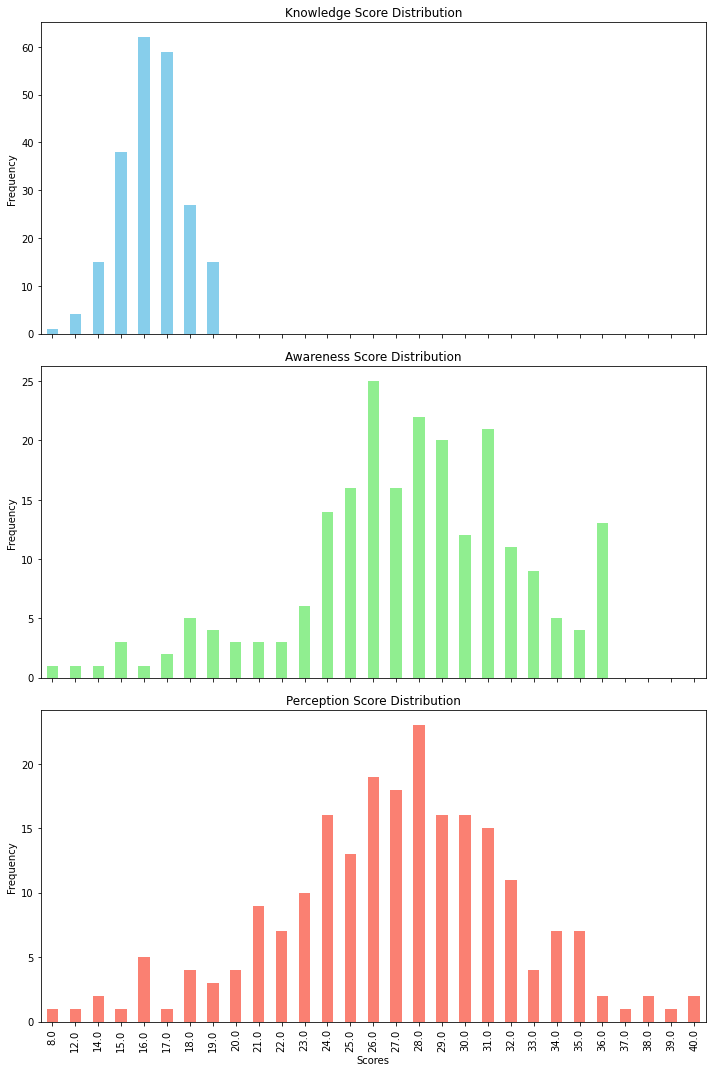

In [114]:
# plot all three scores using subplots
def plot_scores(scores_df):
    """
    Plots the scores for knowledge, awareness, and perception using subplots.
    
    Args:
        scores_df (pd.DataFrame): DataFrame containing the scores.
    """
    fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
    
    # Plot Knowledge Score Distribution
    scores_df['knowledge_score'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title('Knowledge Score Distribution')
    axes[0].set_ylabel('Frequency')
    
    # Plot Awareness Score Distribution
    scores_df['awareness_Score'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightgreen')
    axes[1].set_title('Awareness Score Distribution')
    axes[1].set_ylabel('Frequency')
    
    # Plot Perception Score Distribution
    scores_df['perception_Score'].value_counts().sort_index().plot(kind='bar', ax=axes[2], color='salmon')
    axes[2].set_title('Perception Score Distribution')
    axes[2].set_ylabel('Frequency')
    
    plt.xlabel('Scores')
    plt.tight_layout()
    plt.show()
# Plot the scores
plot_scores(total_scored_df)


In [115]:
# calculate means and standard deviations for knowledge, awareness, and perception scores
def calculate_statistics(scores_df):
    """
    Calculates means and standard deviations for knowledge, awareness, and perception scores.
    
    Args:
        scores_df (pd.DataFrame): DataFrame containing the scores.
    
    Returns:
        pd.DataFrame: DataFrame with means and standard deviations.
    """
    stats = {
        'Mean': scores_df.mean(),
        'Standard Deviation': scores_df.std()
    }
    return pd.DataFrame(stats)
# Calculate statistics for the scores
statistics_df = calculate_statistics(total_scored_df[['knowledge_score', 'awareness_Score', 'perception_Score']])

In [116]:
# Save the statistics to the Excel file
output_excel_file = 'R&D_2025_Combined_Frequency_Tables.xlsx'

try:
    with pd.ExcelWriter(output_excel_file, mode='a', if_sheet_exists='replace') as writer:
        statistics_df.to_excel(writer, sheet_name='Scores_Statistics')
    print(f"\nStatistics have been saved to '{output_excel_file}' on sheet 'Scores_Statistics'.")
except Exception as e:
    print(f"An error occurred while writing to the Excel file: {e}")
# Display the statistics DataFrame
print("\nStatistics for Knowledge, Awareness, and Perception Scores:")


Statistics have been saved to 'R&D_2025_Combined_Frequency_Tables.xlsx' on sheet 'Scores_Statistics'.

Statistics for Knowledge, Awareness, and Perception Scores:


/Users/tankarhau/miniforge3/lib/python3.9/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [117]:
# Define thresholds for good scores
knowledge_threshold = 5
awareness_threshold = 25
perception_threshold = 35

# Calculate counts of good and poor scores
def calculate_score_categories(df):
    """
    Calculates the number of good and poor scores for knowledge, awareness, and perception.
    
    Args:
        df (pd.DataFrame): DataFrame containing the scores.
    
    Returns:
        pd.DataFrame: DataFrame with counts of good and poor scores.
    """
    categories = {
        'Knowledge': {
            'Good': len(df[df['knowledge_score'] >= knowledge_threshold]),
            'Poor': len(df[df['knowledge_score'] < knowledge_threshold])
        },
        'Awareness': {
            'Good': len(df[df['awareness_Score'] >= awareness_threshold]),
            'Poor': len(df[df['awareness_Score'] < awareness_threshold])
        },
        'Perception': {
            'Good': len(df[df['perception_Score'] >= perception_threshold]),
            'Poor': len(df[df['perception_Score'] < perception_threshold])
        }
    }
    return pd.DataFrame(categories)

# Calculate and display the categories
score_categories = calculate_score_categories(total_scored_df)
print("\nCount of Good and Poor Scores:")
print(score_categories)

# Calculate percentages
total_responses = len(total_scored_df)
percentages = score_categories / total_responses * 100
print("\nPercentage of Good and Poor Scores:")
print(percentages.round(2))

# Save the categories to Excel
try:
    with pd.ExcelWriter(output_excel_file, mode='a', if_sheet_exists='replace') as writer:
        score_categories.to_excel(writer, sheet_name='Score_Categories')
        percentages.to_excel(writer, sheet_name='Score_Percentages')
    print(f"\nScore categories and percentages have been saved to '{output_excel_file}'")
except Exception as e:
    print(f"An error occurred while writing to the Excel file: {e}")



Count of Good and Poor Scores:
      Knowledge  Awareness  Perception
Good        163        214          15
Poor         58          7         206

Percentage of Good and Poor Scores:
      Knowledge  Awareness  Perception
Good      73.76      96.83        6.79
Poor      26.24       3.17       93.21

Score categories and percentages have been saved to 'R&D_2025_Combined_Frequency_Tables.xlsx'


/Users/tankarhau/miniforge3/lib/python3.9/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [118]:
from scipy.stats import pearsonr


In [119]:
# study correlation between knowledge, awareness, and perception scores with pearson correlation and p-value
def calculate_correlation(df):
    """
    Calculates the Pearson correlation matrix between knowledge, awareness, and perception scores.
    
    Args:
        df (pd.DataFrame): DataFrame containing the scores.
    
    Returns:
        pd.DataFrame: Correlation matrix with variables as both rows and columns.
    """
    
    # List of score columns
    score_columns = ['knowledge_score', 'awareness_Score', 'perception_Score']
    
    # Initialize correlation matrix
    corr_matrix = pd.DataFrame(index=score_columns, columns=score_columns)
    p_value_matrix = pd.DataFrame(index=score_columns, columns=score_columns)
    
    # Calculate correlations for all pairs
    for var1 in score_columns:
        for var2 in score_columns:
            corr, p_value = pearsonr(df[var1], df[var2])
            corr_matrix.loc[var1, var2] = corr
            p_value_matrix.loc[var1, var2] = p_value
    
    # Create a combined DataFrame with both correlation and p-values
    combined_matrix = pd.DataFrame(index=score_columns, columns=score_columns)
    for var1 in score_columns:
        for var2 in score_columns:
            combined_matrix.loc[var1, var2] = f"{corr_matrix.loc[var1, var2]:.3f} (p={p_value_matrix.loc[var1, var2]:.3f})"
    
    return combined_matrix

# Calculate the correlation between scores
correlation_df = calculate_correlation(total_scored_df)
# Display the correlation DataFrame
print("\nCorrelation between Knowledge, Awareness, and Perception Scores:")
print(correlation_df)
# Save the correlation results to the Excel file



Correlation between Knowledge, Awareness, and Perception Scores:
                  knowledge_score  awareness_Score perception_Score
knowledge_score   1.000 (p=0.000)  0.321 (p=0.000)  0.219 (p=0.001)
awareness_Score   0.321 (p=0.000)  1.000 (p=0.000)  0.239 (p=0.000)
perception_Score  0.219 (p=0.001)  0.239 (p=0.000)  1.000 (p=0.000)


In [ ]:
output_excel_file = 'R&D_2025_Combined_Frequency_Tables.xlsx'
correlation_df = correlation_df.reset_index().rename(columns={'index': 'Variable'})
try:
    with pd.ExcelWriter(output_excel_file, mode='a', if_sheet_exists='replace') as writer:
        correlation_df.to_excel(writer, sheet_name='Scores_Correlation', index=False)
    print(f"\nCorrelation results have been saved to '{output_excel_file}' on sheet 'Scores_Correlation'.")
except Exception as e:
    print(f"An error occurred while writing to the Excel file: {e}")




Correlation results have been saved to 'R&D_2025_Combined_Frequency_Tables.xlsx' on sheet 'Scores_Correlation'.


/Users/tankarhau/miniforge3/lib/python3.9/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


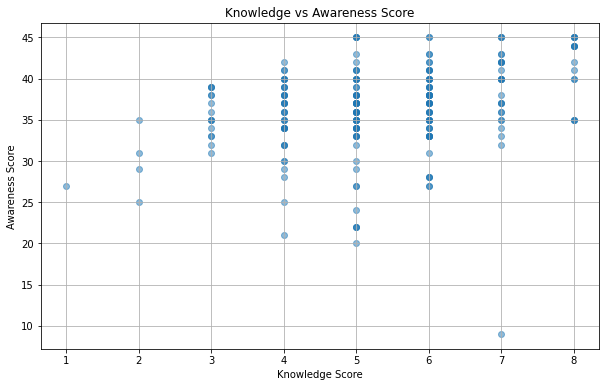

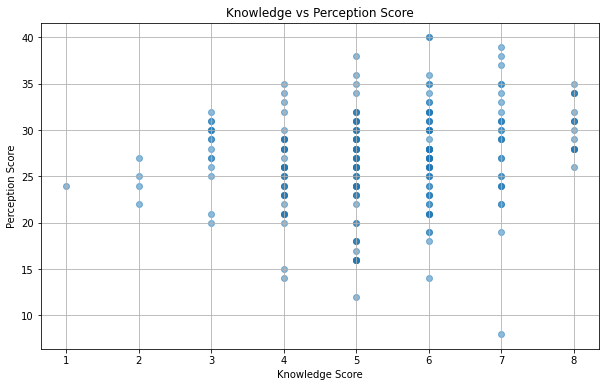

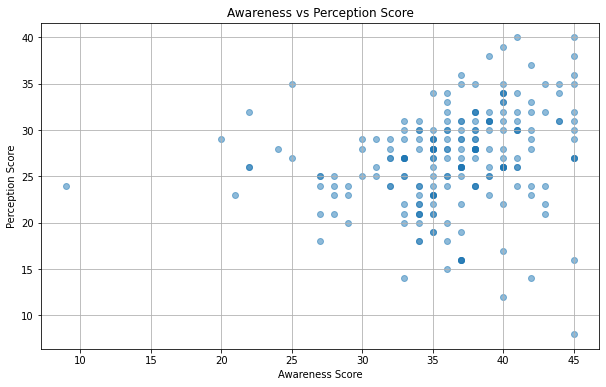

In [120]:
## plot the knowledge, awareness, and perception x values vs y values
def plot_scores_vs(df, x_col, y_col, title):
    """
    Plots the relationship between two score columns.
    
    Args:
        df (pd.DataFrame): DataFrame containing the scores.
        x_col (str): Column name for the x-axis.
        y_col (str): Column name for the y-axis.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_col], df[y_col], alpha=0.5)
    plt.title(title)
    plt.xlabel(x_col.replace('_', ' ').title())
    plt.ylabel(y_col.replace('_', ' ').title())
    plt.grid(True)
    plt.show()
# Plot Knowledge vs Awareness
plot_scores_vs(total_scored_df, 'knowledge_score', 'awareness_Score', 'Knowledge vs Awareness Score')
# Plot Knowledge vs Perception
plot_scores_vs(total_scored_df, 'knowledge_score', 'perception_Score', 'Knowledge vs Perception Score')
# Plot Awareness vs Perception
plot_scores_vs(total_scored_df, 'awareness_Score', 'perception_Score', 'Awareness vs Perception Score')
# Save the final DataFrame with scores to the Excel file


In [127]:
final_df.head(2).to_clipboard(index=False)

In [122]:
# combine all dataframes into one final dataframe
final_df = pd.concat([df, total_scored_df], axis=1)

In [128]:
from scipy.stats import chi2_contingency

def chi_square_test(df, col1, col2):
    """
    Performs Chi-Square test of independence between two categorical columns.
    
    Args:
        df (pd.DataFrame): DataFrame containing the data.
        col1 (str): First column name.
        col2 (str): Second column name.
    
    Returns:
        tuple: Chi-Square statistic, p-value, degrees of freedom, and expected frequencies.
        
    Raises:
        ValueError: If the input columns are not categorical or if the data cannot be properly
                   converted to a contingency table.
    """
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    return chi2_stat, p_value, dof, expected
# Perform Chi-Square test for Age vs Knowledge Score
chi2_stat, p_value, dof, expected = chi_square_test(final_df, 'Age', final_df.columns[final_df.columns == 'knowledge_score'][0])
print("\nChi-Square Test Results for Age vs Knowledge Score:")
print(f"Chi-Square Statistic: {chi2_stat:.3f}, p-value: {p_value:.3f}, Degrees of Freedom: {dof}")


ValueError: Data must be 1-dimensional, got ndarray of shape (221, 2) instead

In [126]:
final_df.to_clipboard(index=False)